# 🛍️ Customer Segmentation using K-Means


In [4]:
# This notebook demonstrates customer segmentation using K-Means clustering.
# We use the popular Mall Customers dataset and segment customers based on their Annual Income and Spending Score.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Optional: set a visual style
sns.set(style='whitegrid')

# 📥 Load Dataset

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 🔍 Select and Scale Features

In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🤖 Apply K-Means Clustering

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels
df['Cluster'] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


# 📊 Visualize Clusters

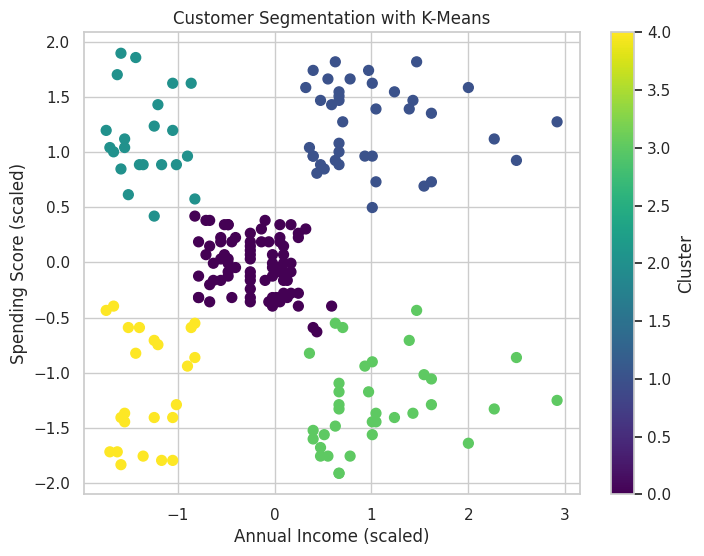

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segmentation with K-Means')
plt.colorbar(label='Cluster')
plt.show()

# 📈 Analyze Cluster Averages

In [9]:
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043
